# Circular dipole launch plasmon

In [2]:
import meep as mp
from meep.materials import Al, Ag, Au, SiO2
import numpy as np

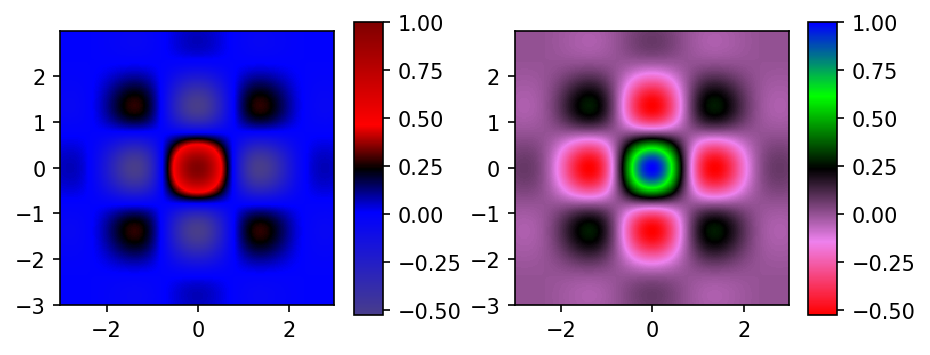

In [3]:
## Define a color map
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
##
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    delta = 0.025
    x = y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-0.3*X**2 - 0.3* Y**2) * np.cos(2*X) * np.cos(2*Y)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False,dpi=150)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(X,Y,Z,cmap=cmap, rasterized=True,shading='auto')
        ax.set_aspect('equal', 'box')
        fig.colorbar(psm, ax=ax,shrink=0.65)
    plt.show()
##

colors = ["darkslateblue","blue", "black", "red","maroon"]
nodes = [0.0,0.35, 0.5, 0.65, 1.0]
mycmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
colors1 = ["red","violet", "black", "lime","blue"]
nodes1 = [0.0,0.25, 0.5, 0.75, 1.0]
mycmap1 = LinearSegmentedColormap.from_list("mycmap1", list(zip(nodes1, colors1)))
plot_examples([mycmap,mycmap1])

In [5]:
cell = mp.Vector3(3,3,0)
geometry = [ mp.Block(mp.Vector3(mp.inf,0.005,mp.inf),
                     center=mp.Vector3(),
                      material=Ag)
           ]


-----------
Initializing structure...
time for choose_chunkdivision = 0.00011611 s
Working in 2D dimensions.
Computational cell is 3 x 3 x 0 with resolution 100
     block, center = (0,0,0)
          size (1e+20,0.005,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.101209 s
lorentzian susceptibility: frequency=16.365, gamma=1.95106
lorentzian susceptibility: frequency=7.32593, gamma=0.738804
lorentzian susceptibility: frequency=6.60165, gamma=0.052426
lorentzian susceptibility: frequency=3.61417, gamma=0.364563
lorentzian susceptibility: frequency=0.658148, gamma=3.13427
drude susceptibility: frequency=1e-10, gamma=0.0387146
-----------


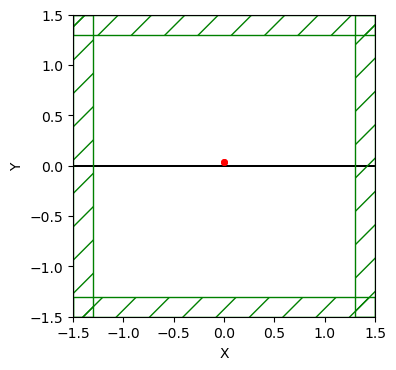

In [7]:

sources = [mp.Source(mp.ContinuousSource(frequency=2),
                     component=mp.Ey,
                     center=mp.Vector3(0,0.04),
                    size=mp.Vector3(0,0)),
           mp.Source(mp.ContinuousSource(frequency=2),
                     component=mp.Ex,
                     center=mp.Vector3(0,0.04),
                    size=mp.Vector3(0,0.0),
                    amplitude=0+1j)]
pml_layers = [mp.PML(0.2)]
resolution = 100
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(dpi=100)
sim.plot2D()
plt.show()


FloatProgress(value=12.0, description='0% done ', max=18.0, min=12.0)

on time step 2400 (time=12), 0.00805501 s/step
run 2 finished at t = 18.0 (3600 timesteps)


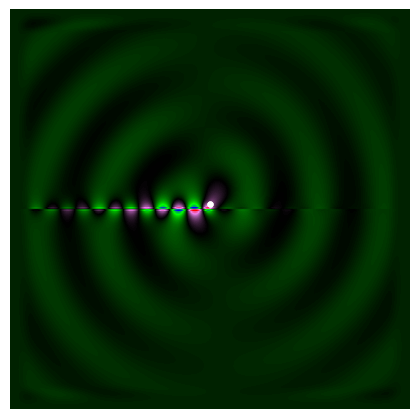

In [10]:
sim.run(until=6)
fig = plt.figure(dpi=100)
#fig, ax = plt.subplots(dpi=300)
ax = plt.Axes(fig, [0.0, 0.0, 1, 1])
ax.set_axis_off()
fig.add_axes(ax)
#plt.figure(dpi=300)
sim.plot2D(ax=ax,fields=mp.Ey,plot_boundaries_flag=False,labels=False,
           field_parameters={'alpha':1, 'cmap':mycmap1,'post_process':np.real}
           ,source_parameters={'alpha':1,'color':'white','linewidth':1.5,'hatch':'o'})


plt.show()

In [11]:
def modu_f(fd):
    output = np.sign(fd) * np.abs(fd) ** 0.7
    return output
    

#sim.reset_meep()
f = plt.figure(dpi=300)
#ax = plt.Axes(f, [0.0, 0.0, 1, 1])
#ax.set_axis_off()
#fig.add_axes(ax)
#plt.axis('off')
Animate = mp.Animate2D(sim,plot_boundaries_flag=False,
                       fields=mp.Ey, f=f, realtime=False, normalize=True,field_parameters={'post_process':modu_f,'alpha':1, 'cmap':mycmap}
                      ,source_parameters={'alpha':1,'color':'white','linewidth':0.5,'hatch':''})

plt.close()

In [12]:
sim.run(mp.at_every(0.02,Animate),until=1-0.02)
plt.close()

FloatProgress(value=18.0, description='0% done ', max=18.98, min=18.0)

on time step 3600 (time=18), 0.0337672 s/step
Normalizing field data...
run 3 finished at t = 18.985 (3797 timesteps)


In [13]:
#filename = "dr.mp4"
gifname = "c_dr_plasmon_untrim.gif"
#Animate.to_mp4(10,filename)
Animate.to_gif(6,gifname)

## use imagemagick, +repage to remove virtual canvus
! convert c_dr_plasmon_untrim.gif -crop 600x600+623+299  +repage c_dr_plasmon.gif 

Generating GIF...


## Circular dipole and SPPs, spin-momentum locking
![spin-momentum locking](./c_dr_plasmon.gif )